In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
! ls ../data/

MIG_EMP_EDUCATION_22022024161838929.csv
countries_codes_and_coordinates.csv
employment_birth_education.xls
employment_birth_sex.csv
inflows of foreign population by nationality.csv
inward_remittance_flows_december_2023_1.xlsx


In [2]:
employment_by_gender_birth = pd.read_csv("../data/employment_birth_sex.csv")
employment_by_gender_birth.head()

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
1,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2001,2001,PC,Percentage,0,Units,NaN,NaN,73.9,NaN,NaN
2,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2002,2002,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
3,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2003,2003,PC,Percentage,0,Units,NaN,NaN,74.1,NaN,NaN
4,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2004,2004,PC,Percentage,0,Units,NaN,NaN,75.6,NaN,NaN


In [76]:
employment_by_gender_birth['Rate'].unique()

array(['Employment rate', 'Unemployment rate', 'Participation rate'],
      dtype=object)

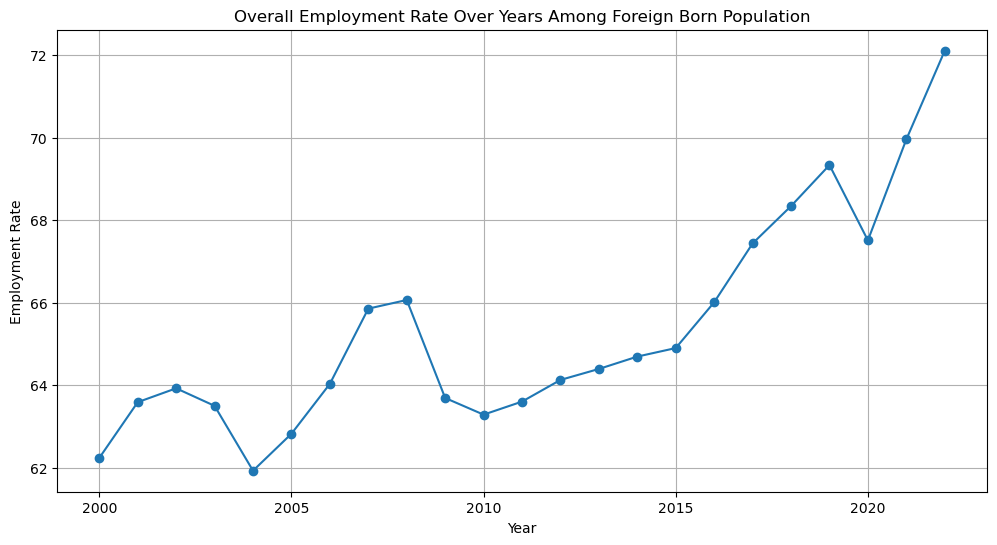

In [3]:
overall_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['Gender'] == 'Total') & (employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['BIRTH'] == 'FB')]
overall_employment_rate = overall_employment_rate.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(overall_employment_rate.index, overall_employment_rate.values, marker='o')
plt.title('Overall Employment Rate Over Years Among Foreign Born Population')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.show()


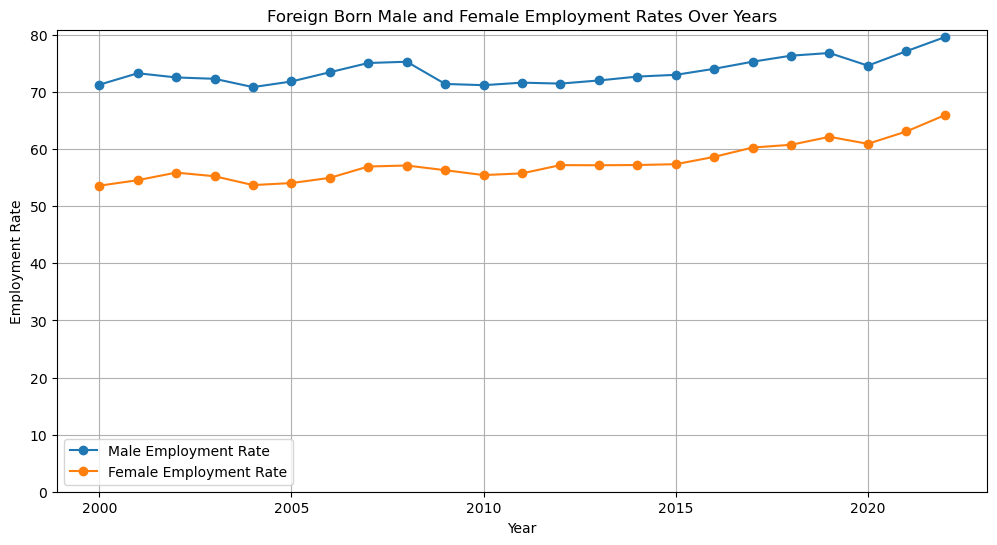

In [4]:
plt.figure(figsize=(12, 6))

male_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['Gender'] == 'Men') & (employment_by_gender_birth['BIRTH'] == 'FB')]
male_employment_rate = male_employment_rate.groupby('Year')['Value'].mean()
plt.plot(male_employment_rate.index, male_employment_rate.values, marker='o', label='Male Employment Rate')

female_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['Gender'] == 'Women') & (employment_by_gender_birth['BIRTH'] == 'FB')]
female_employment_rate = female_employment_rate.groupby('Year')['Value'].mean()
plt.plot(female_employment_rate.index, female_employment_rate.values, marker='o', label='Female Employment Rate')

plt.ylim(0) 
plt.title('Foreign Born Male and Female Employment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend()
plt.show()


# Time Series of Employment Among Foreign Borns in USA.

In [7]:
employment_by_gender_birth.head()

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
1,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2001,2001,PC,Percentage,0,Units,NaN,NaN,73.9,NaN,NaN
2,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2002,2002,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
3,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2003,2003,PC,Percentage,0,Units,NaN,NaN,74.1,NaN,NaN
4,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2004,2004,PC,Percentage,0,Units,NaN,NaN,75.6,NaN,NaN


In [8]:
employment_by_gender_birth['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom',
       'United States', 'Chile', 'Estonia', 'Israel', 'Slovenia',
       'OECD - Total', 'Latvia', 'Lithuania'], dtype=object)

In [3]:
employment_in_usa = employment_by_gender_birth[(employment_by_gender_birth['Country'] == "United States") & (employment_by_gender_birth["RATE"] == "N_RATE")]
employment_in_usa = employment_in_usa[["Year", "Country", "Gender", "Value"]]

In [4]:
# excluding total gender
employment_in_usa = employment_in_usa[employment_in_usa["Gender"] != "Total"]

In [17]:
print(f"{employment_in_usa.head()}\n{employment_in_usa.tail()}")


      Year        Country Gender  Value
5311  2000  United States    Men   82.4
5312  2001  United States    Men   81.4
5313  2002  United States    Men   80.1
5314  2003  United States    Men   80.2
5315  2004  United States    Men   81.6
       Year        Country Gender  Value
11613  2018  United States  Women   65.6
11614  2019  United States  Women   66.4
11615  2020  United States  Women   62.5
11616  2021  United States  Women   64.5
11617  2022  United States  Women   66.0


Mean Squared Error for Men: 21.255664312773064
R2 Score for Men: -0.4558275329972512


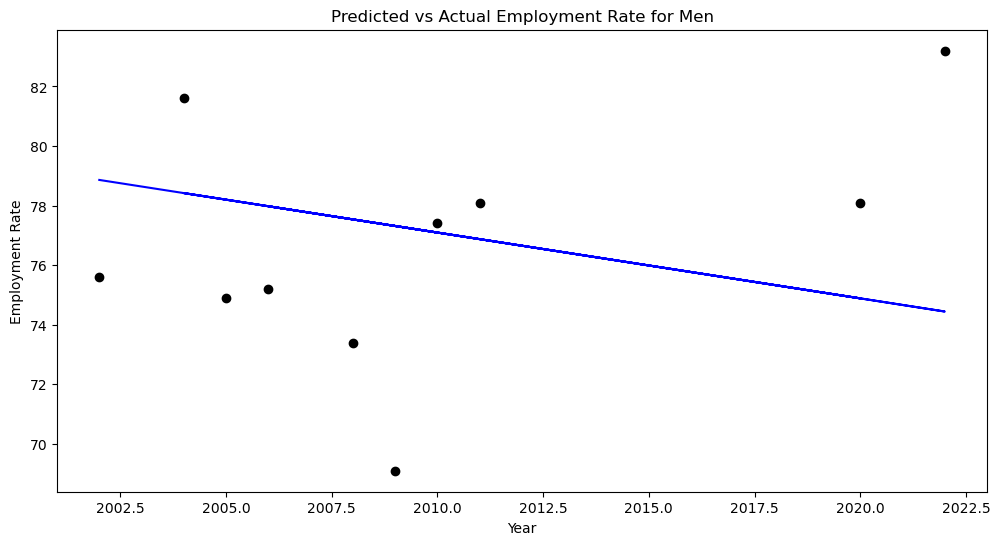

Mean Squared Error for Women: 18.61959139685372
R2 Score for Women: -0.09862411697203366


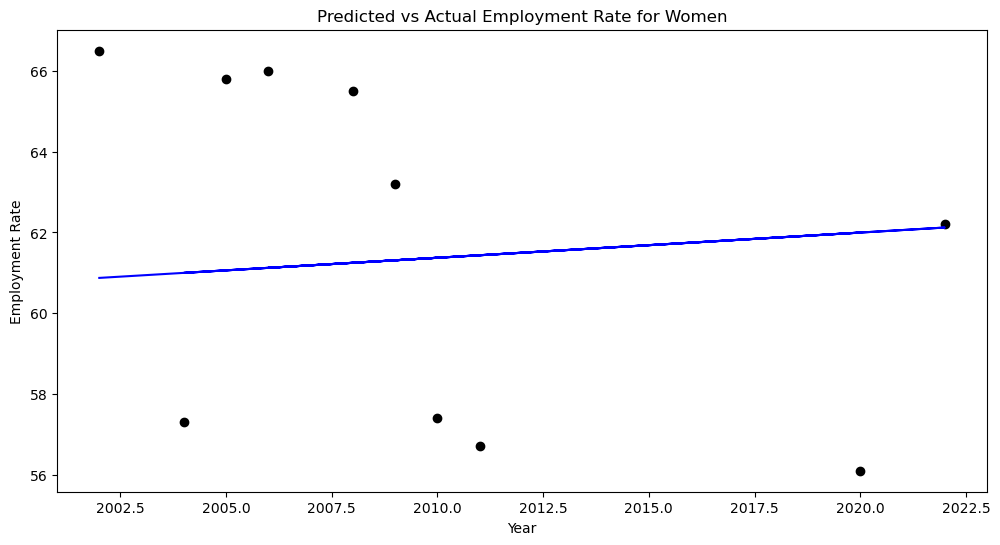

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate data for Men and Women
employment_in_usa_men = employment_in_usa[employment_in_usa["Gender"] == "Men"]
employment_in_usa_women = employment_in_usa[employment_in_usa["Gender"] == "Women"]

# For Men
X_men = employment_in_usa_men['Year'].astype(int).values.reshape(-1,1)
y_men = employment_in_usa_men['Value'].values

X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.2, random_state=0)

model_men = LinearRegression()
model_men.fit(X_train_men, y_train_men)

y_pred_men = model_men.predict(X_test_men)

print('Mean Squared Error for Men:', mean_squared_error(y_test_men, y_pred_men))
print('R2 Score for Men:', r2_score(y_test_men, y_pred_men))

plt.figure(figsize=(12, 6))
plt.scatter(X_test_men, y_test_men, color='black')
plt.plot(X_test_men, y_pred_men, color='blue')
plt.title('Predicted vs Actual Employment Rate for Men')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.show()

# For Women
X_women = employment_in_usa_women['Year'].astype(int).values.reshape(-1,1)
y_women = employment_in_usa_women['Value'].values

X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.2, random_state=0)

model_women = LinearRegression()
model_women.fit(X_train_women, y_train_women)

y_pred_women = model_women.predict(X_test_women)

print('Mean Squared Error for Women:', mean_squared_error(y_test_women, y_pred_women))
print('R2 Score for Women:', r2_score(y_test_women, y_pred_women))

plt.figure(figsize=(12, 6))
plt.scatter(X_test_women, y_test_women, color='black')
plt.plot(X_test_women, y_pred_women, color='blue')
plt.title('Predicted vs Actual Employment Rate for Women')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.show()



In [43]:
# SARIMA model for better forecasting.
# not working

from statsmodels.tsa.statespace.sarimax import SARIMAX

# For Men
model_men = SARIMAX(y_train_men, order=(5, 1, 0), seasonal_order=(1, 1, 1, 10))
model_men_fit = model_men.fit(disp=False)

y_pred_men = model_men_fit.predict(len(y_train_men), len(y_train_men) + len(y_test_men) - 1)

# For Women
model_women = SARIMAX(y_train_women, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_women_fit = model_women.fit(disp=False)

y_pred_women = model_women_fit.predict(len(y_train_women), len(y_train_women) + len(y_test_women) - 1)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


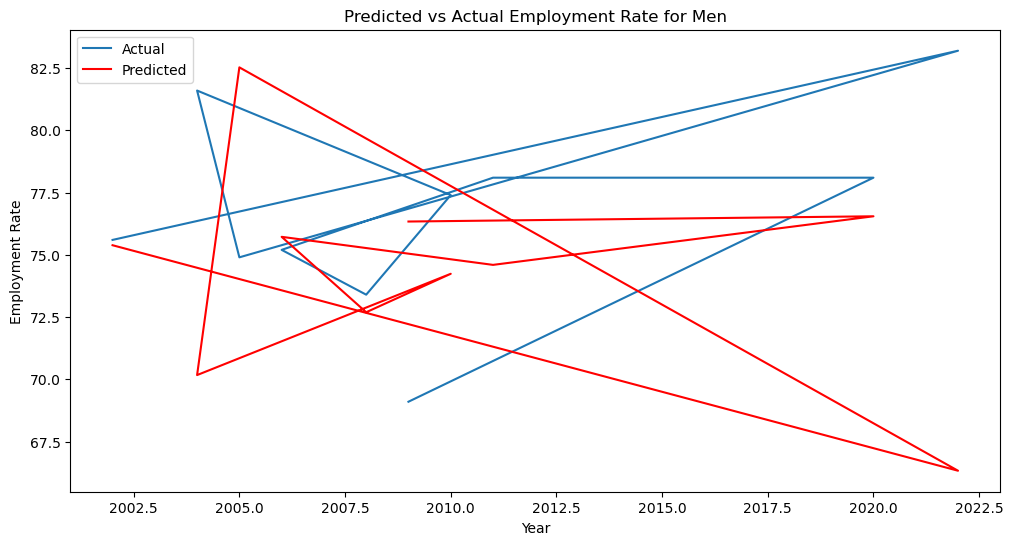

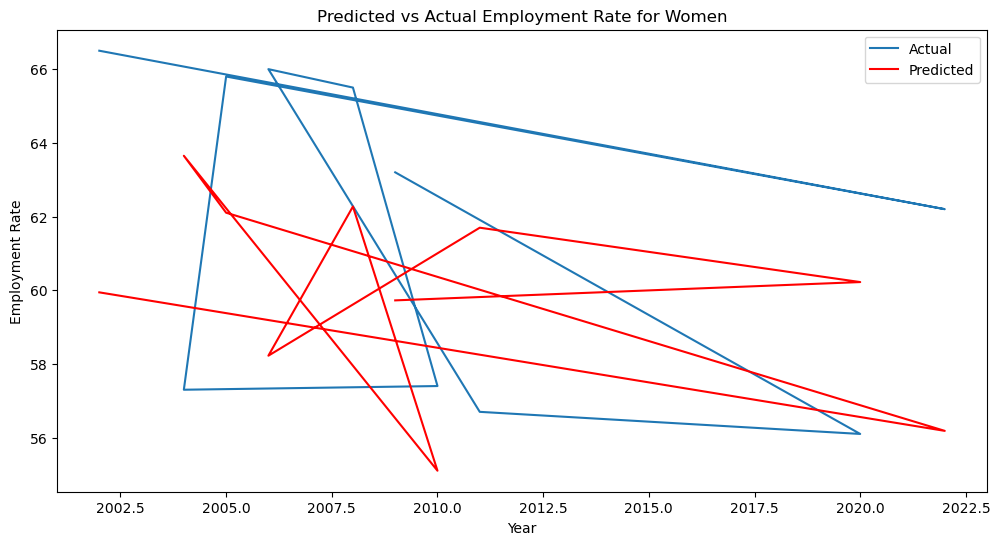

In [44]:
# For Men
plt.figure(figsize=(12, 6))
plt.plot(X_test_men, y_test_men, label='Actual')
plt.plot(X_test_men, y_pred_men, color='red', label='Predicted')
plt.title('Predicted vs Actual Employment Rate for Men')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

# For Women
plt.figure(figsize=(12, 6))
plt.plot(X_test_women, y_test_women, label='Actual')
plt.plot(X_test_women, y_pred_women, color='red', label='Predicted')
plt.title('Predicted vs Actual Employment Rate for Women')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()


In [7]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.9.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (7.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.6.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.5.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.3.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached pystan-3.2.0-py3-none-any.whl.metadata (3.6 kB)
INFO: pip i

In [6]:

from fbprophet import Prophet

# For Men
df_men = pd.DataFrame({'ds': X_train_men.flatten(), 'y': y_train_men})
model_men = Prophet()
model_men.fit(df_men)

future_men = model_men.make_future_dataframe(periods=len(X_test_men))
forecast_men = model_men.predict(future_men)

y_pred_men = forecast_men['yhat'][len(y_train_men):]

# For Women
df_women = pd.DataFrame({'ds': X_train_women.flatten(), 'y': y_train_women})
model_women = Prophet()
model_women.fit(df_women)

future_women = model_women.make_future_dataframe(periods=len(X_test_women))
forecast_women = model_women.predict(future_women)

y_pred_women = forecast_women['yhat'][len(y_train_women):]


ModuleNotFoundError: No module named 'fbprophet'

Employment Over Time

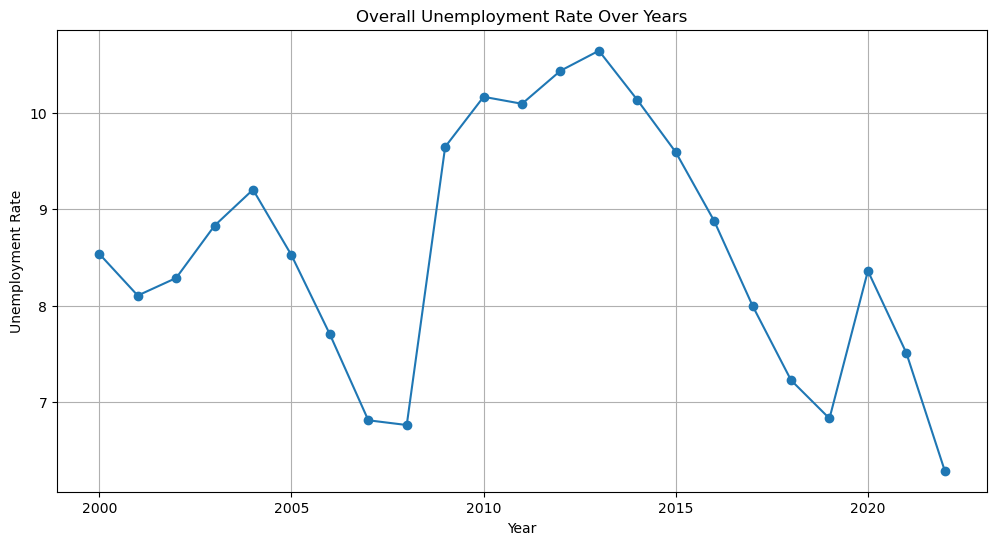

In [78]:
overall_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Gender'] == 'Total') & (employment_by_gender_birth['Rate'] == "Unemployment rate")]
overall_unemployment_rate = overall_unemployment_rate.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(overall_unemployment_rate.index, overall_unemployment_rate.values, marker='o')
plt.title('Overall Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()



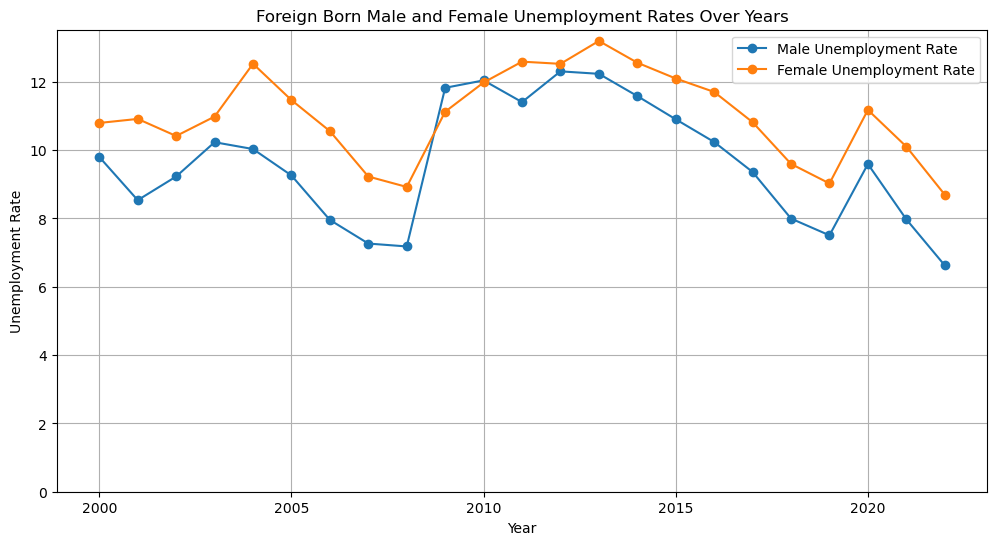

In [88]:
plt.figure(figsize=(12, 6))

male_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Men') & (employment_by_gender_birth['BIRTH'] == 'FB')]
male_unemployment_rate = male_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(male_unemployment_rate.index, male_unemployment_rate.values, marker='o', label='Male Unemployment Rate')

female_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Women') & (employment_by_gender_birth['BIRTH'] == 'FB')]
female_unemployment_rate = female_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(female_unemployment_rate.index, female_unemployment_rate.values, marker='o', label='Female Unemployment Rate')

plt.ylim(0)  # Start the y-axis from 0
plt.title('Foreign Born Male and Female Unemployment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()


# employment rate among foreign born population in top migrating countries in 2022

In [3]:
employment_by_gender_birth = employment_by_gender_birth[employment_by_gender_birth['RATE'] == "N_RATE"]


In [9]:
employment_by_gender_birth = employment_by_gender_birth.sort_values(by='Value', ascending=False)
top_5_countries = ['United States', 'Italy', 'Kora', 'Germany']
top_5 = employment_by_gender_birth[employment_by_gender_birth['Country'].isin(top_5_countries)]
top_5_22 = top_5[(top_5['Year'] == 2022) & (top_5["Gender"] != 'Total')]
# top_5 = top_5.head()

In [10]:
top_5_22

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5333,USA,United States,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,83.2,NaN,NaN
7818,DEU,Germany,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,81.3,NaN,NaN
1606,DEU,Germany,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,78.1,NaN,NaN
2636,ITA,Italy,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,77.4,NaN,NaN
7887,DEU,Germany,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,76.6,NaN,NaN
11548,USA,United States,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,72.9,NaN,NaN
8853,ITA,Italy,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,68.0,NaN,NaN
11617,USA,United States,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,66.0,NaN,NaN
5402,USA,United States,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,62.2,NaN,NaN
1675,DEU,Germany,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,61.2,NaN,NaN


In [17]:
top_5_22['BIRTH'].unique()

array(['FB', 'NB'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

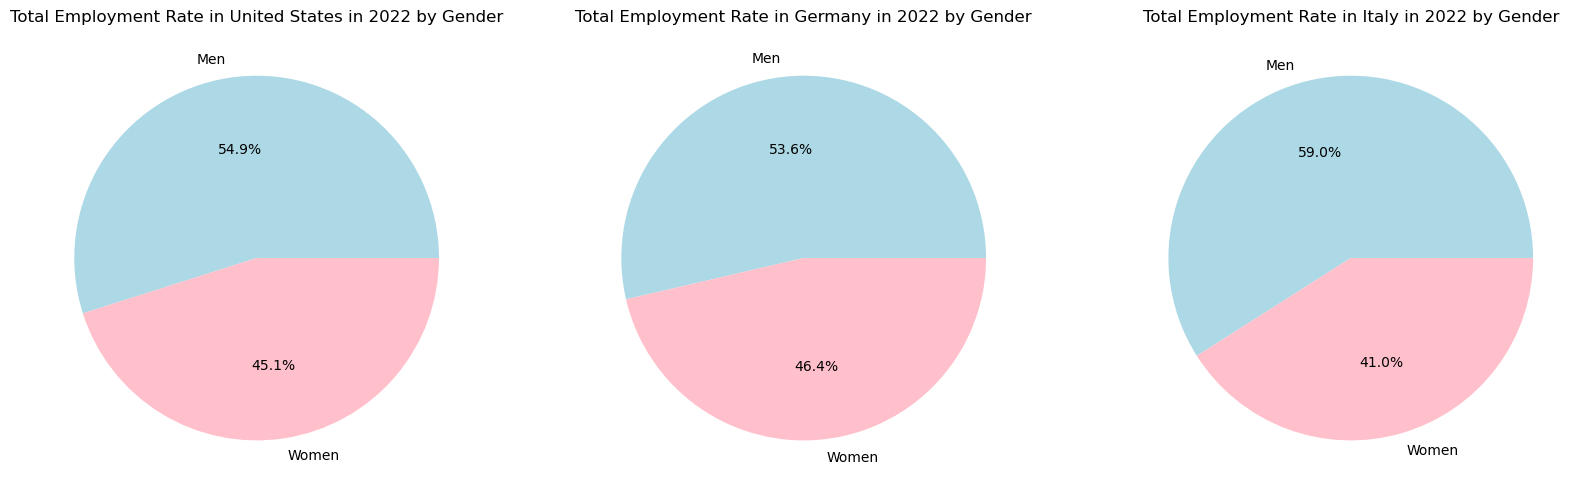

In [20]:
# employment rate among foreign born population in top imigrating countries in 2022
plt.figure(figsize=(15, 10))

countries = top_5_22['Country'].unique()

fig, axs = plt.subplots(1, len(countries), figsize=(20, 6))

for i, country in enumerate(countries):
    country_data = top_5_22[top_5_22['Country'] == country]
    employment_rate = country_data[country_data['Rate'] == 'Employment rate']
    employment_rate = employment_rate.groupby('Gender')['Value'].sum()
    
    axs[i].pie(employment_rate.values, labels=employment_rate.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axs[i].set_title(f'Total Employment Rate in {country} in 2022 by Gender')

plt.show()


